In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
import hmmlearn
from hmmlearn import hmm
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
# from hmmlearn.learn import GaussianHMM
# import hmmlearn as hmm
# from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sklearn.pipeline
import convertdate as c 


In [2]:
powergrid = c.datasets("train.csv", 'test_v1.csv')
train_data, test_data= powergrid.data, powergrid.target

In [3]:
# dates = np.array(train_data['DateTime'], dtype=int)
# power = np.array(train_data['Global_active_power'])

In [4]:
train_data

,Date,DateTime,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,2006-12-16 17:24:00,1900-01-01 17:24:00,NaN,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,2006-12-16 17:25:00,1900-01-01 17:25:00,NaN,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,2006-12-16 17:26:00,1900-01-01 17:26:00,5.37400,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,2006-12-16 17:27:00,1900-01-01 17:27:00,5.38800,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,2006-12-16 17:28:00,1900-01-01 17:28:00,3.66600,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,2006-12-16 17:29:00,1900-01-01 17:29:00,3.52000,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,2006-12-16 17:30:00,1900-01-01 17:30:00,3.70200,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,2006-12-16 17:31:00,1900-01-01 17:31:00,NaN,0.520,235.22,15.8,0.0,1.0,17.0
8,2006-12-16,2006-12-16 17:32:00,1900-01-01 17:32:00,NaN,0.510,233.99,15.8,0.0,1.0,17.0
9,2006-12-16,2006-12-16 17:33:00,1900-01-01 17:33:00,3.66200,0.510,233.86,15.8,0.0,2.0,16.0


In [5]:
def weekday(date):
    return date.isoweekday()

In [6]:
train_data['weekday']= train_data['Date'].apply(weekday)

In [7]:
train_data

,Date,DateTime,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,weekday
0,2006-12-16,2006-12-16 17:24:00,1900-01-01 17:24:00,NaN,0.418,234.84,18.4,0.0,1.0,17.0,6
1,2006-12-16,2006-12-16 17:25:00,1900-01-01 17:25:00,NaN,0.436,233.63,23.0,0.0,1.0,16.0,6
2,2006-12-16,2006-12-16 17:26:00,1900-01-01 17:26:00,5.37400,0.498,233.29,23.0,0.0,2.0,17.0,6
3,2006-12-16,2006-12-16 17:27:00,1900-01-01 17:27:00,5.38800,0.502,233.74,23.0,0.0,1.0,17.0,6
4,2006-12-16,2006-12-16 17:28:00,1900-01-01 17:28:00,3.66600,0.528,235.68,15.8,0.0,1.0,17.0,6
5,2006-12-16,2006-12-16 17:29:00,1900-01-01 17:29:00,3.52000,0.522,235.02,15.0,0.0,2.0,17.0,6
6,2006-12-16,2006-12-16 17:30:00,1900-01-01 17:30:00,3.70200,0.520,235.09,15.8,0.0,1.0,17.0,6
7,2006-12-16,2006-12-16 17:31:00,1900-01-01 17:31:00,NaN,0.520,235.22,15.8,0.0,1.0,17.0,6
8,2006-12-16,2006-12-16 17:32:00,1900-01-01 17:32:00,NaN,0.510,233.99,15.8,0.0,1.0,17.0,6
9,2006-12-16,2006-12-16 17:33:00,1900-01-01 17:33:00,3.66200,0.510,233.86,15.8,0.0,2.0,16.0,6


In [8]:
train_data['year']= train_data['Date'].dt.year

In [9]:
train_data

,Date,DateTime,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,weekday,year
0,2006-12-16,2006-12-16 17:24:00,1900-01-01 17:24:00,NaN,0.418,234.84,18.4,0.0,1.0,17.0,6,2006
1,2006-12-16,2006-12-16 17:25:00,1900-01-01 17:25:00,NaN,0.436,233.63,23.0,0.0,1.0,16.0,6,2006
2,2006-12-16,2006-12-16 17:26:00,1900-01-01 17:26:00,5.37400,0.498,233.29,23.0,0.0,2.0,17.0,6,2006
3,2006-12-16,2006-12-16 17:27:00,1900-01-01 17:27:00,5.38800,0.502,233.74,23.0,0.0,1.0,17.0,6,2006
4,2006-12-16,2006-12-16 17:28:00,1900-01-01 17:28:00,3.66600,0.528,235.68,15.8,0.0,1.0,17.0,6,2006
5,2006-12-16,2006-12-16 17:29:00,1900-01-01 17:29:00,3.52000,0.522,235.02,15.0,0.0,2.0,17.0,6,2006
6,2006-12-16,2006-12-16 17:30:00,1900-01-01 17:30:00,3.70200,0.520,235.09,15.8,0.0,1.0,17.0,6,2006
7,2006-12-16,2006-12-16 17:31:00,1900-01-01 17:31:00,NaN,0.520,235.22,15.8,0.0,1.0,17.0,6,2006
8,2006-12-16,2006-12-16 17:32:00,1900-01-01 17:32:00,NaN,0.510,233.99,15.8,0.0,1.0,17.0,6,2006
9,2006-12-16,2006-12-16 17:33:00,1900-01-01 17:33:00,3.66200,0.510,233.86,15.8,0.0,2.0,16.0,6,2006


In [10]:
train_data['month']= train_data['Date'].dt.month

In [11]:
train_data['day']= train_data['Date'].dt.day

In [12]:
train_data

,Date,DateTime,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,weekday,year,month,day
0,2006-12-16,2006-12-16 17:24:00,1900-01-01 17:24:00,NaN,0.418,234.84,18.4,0.0,1.0,17.0,6,2006,12,16
1,2006-12-16,2006-12-16 17:25:00,1900-01-01 17:25:00,NaN,0.436,233.63,23.0,0.0,1.0,16.0,6,2006,12,16
2,2006-12-16,2006-12-16 17:26:00,1900-01-01 17:26:00,5.37400,0.498,233.29,23.0,0.0,2.0,17.0,6,2006,12,16
3,2006-12-16,2006-12-16 17:27:00,1900-01-01 17:27:00,5.38800,0.502,233.74,23.0,0.0,1.0,17.0,6,2006,12,16
4,2006-12-16,2006-12-16 17:28:00,1900-01-01 17:28:00,3.66600,0.528,235.68,15.8,0.0,1.0,17.0,6,2006,12,16
5,2006-12-16,2006-12-16 17:29:00,1900-01-01 17:29:00,3.52000,0.522,235.02,15.0,0.0,2.0,17.0,6,2006,12,16
6,2006-12-16,2006-12-16 17:30:00,1900-01-01 17:30:00,3.70200,0.520,235.09,15.8,0.0,1.0,17.0,6,2006,12,16
7,2006-12-16,2006-12-16 17:31:00,1900-01-01 17:31:00,NaN,0.520,235.22,15.8,0.0,1.0,17.0,6,2006,12,16
8,2006-12-16,2006-12-16 17:32:00,1900-01-01 17:32:00,NaN,0.510,233.99,15.8,0.0,1.0,17.0,6,2006,12,16
9,2006-12-16,2006-12-16 17:33:00,1900-01-01 17:33:00,3.66200,0.510,233.86,15.8,0.0,2.0,16.0,6,2006,12,16


In [13]:
def weekNum(date):
    year, week, weekday = date.isocalendar()
    return week

In [14]:
train_data['weekNum']= train_data['Date'].apply(weekNum)

In [15]:
train_data

,Date,DateTime,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,weekday,year,month,day,weekNum
0,2006-12-16,2006-12-16 17:24:00,1900-01-01 17:24:00,NaN,0.418,234.84,18.4,0.0,1.0,17.0,6,2006,12,16,50
1,2006-12-16,2006-12-16 17:25:00,1900-01-01 17:25:00,NaN,0.436,233.63,23.0,0.0,1.0,16.0,6,2006,12,16,50
2,2006-12-16,2006-12-16 17:26:00,1900-01-01 17:26:00,5.37400,0.498,233.29,23.0,0.0,2.0,17.0,6,2006,12,16,50
3,2006-12-16,2006-12-16 17:27:00,1900-01-01 17:27:00,5.38800,0.502,233.74,23.0,0.0,1.0,17.0,6,2006,12,16,50
4,2006-12-16,2006-12-16 17:28:00,1900-01-01 17:28:00,3.66600,0.528,235.68,15.8,0.0,1.0,17.0,6,2006,12,16,50
5,2006-12-16,2006-12-16 17:29:00,1900-01-01 17:29:00,3.52000,0.522,235.02,15.0,0.0,2.0,17.0,6,2006,12,16,50
6,2006-12-16,2006-12-16 17:30:00,1900-01-01 17:30:00,3.70200,0.520,235.09,15.8,0.0,1.0,17.0,6,2006,12,16,50
7,2006-12-16,2006-12-16 17:31:00,1900-01-01 17:31:00,NaN,0.520,235.22,15.8,0.0,1.0,17.0,6,2006,12,16,50
8,2006-12-16,2006-12-16 17:32:00,1900-01-01 17:32:00,NaN,0.510,233.99,15.8,0.0,1.0,17.0,6,2006,12,16,50
9,2006-12-16,2006-12-16 17:33:00,1900-01-01 17:33:00,3.66200,0.510,233.86,15.8,0.0,2.0,16.0,6,2006,12,16,50


In [16]:
tyear= train_data[(train_data['year']==2007) & (train_data['month'] == 5) & (train_data['weekNum'] == 18)
                 & (train_data['weekday']!=6) & (train_data['weekday']!=7)]

In [17]:
tyear

,Date,DateTime,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,weekday,year,month,day,weekNum
194796,2007-05-01,2007-05-01 00:00:00,1900-01-01 00:00:00,0.54490,0.084,241.38,1.4,0.0,0.0,0.0,2,2007,5,1,18
194797,2007-05-01,2007-05-01 00:01:00,1900-01-01 00:01:00,0.32400,0.082,241.16,1.4,0.0,0.0,1.0,2,2007,5,1,18
194798,2007-05-01,2007-05-01 00:02:00,1900-01-01 00:02:00,0.32400,0.082,241.28,1.4,0.0,0.0,1.0,2,2007,5,1,18
194799,2007-05-01,2007-05-01 00:03:00,1900-01-01 00:03:00,0.32400,0.084,241.40,1.4,0.0,0.0,0.0,2,2007,5,1,18
194800,2007-05-01,2007-05-01 00:04:00,1900-01-01 00:04:00,0.54125,0.084,241.21,1.4,0.0,0.0,1.0,2,2007,5,1,18
194801,2007-05-01,2007-05-01 00:05:00,1900-01-01 00:05:00,0.54185,0.084,241.52,1.4,0.0,0.0,1.0,2,2007,5,1,18
194802,2007-05-01,2007-05-01 00:06:00,1900-01-01 00:06:00,0.32000,0.084,241.50,1.4,0.0,0.0,0.0,2,2007,5,1,18
194803,2007-05-01,2007-05-01 00:07:00,1900-01-01 00:07:00,0.54535,0.086,241.82,1.4,0.0,0.0,1.0,2,2007,5,1,18
194804,2007-05-01,2007-05-01 00:08:00,1900-01-01 00:08:00,0.41600,0.192,242.25,1.8,0.0,0.0,1.0,2,2007,5,1,18
194805,2007-05-01,2007-05-01 00:09:00,1900-01-01 00:09:00,0.42800,0.224,243.04,2.0,0.0,0.0,0.0,2,2007,5,1,18


In [18]:
dates = tyear['DateTime']
power = tyear[['Global_active_power']]

In [19]:
model = hmm.GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(power)

/Users/janet/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/janet/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/janet/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/janet/anaconda/lib/python3.6/site-packages/skl

In [20]:
hidden_states = model.predict(power)

/Users/janet/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


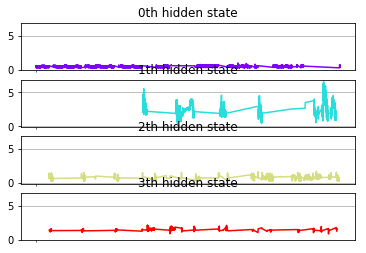

In [21]:
fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], power[mask], "-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()

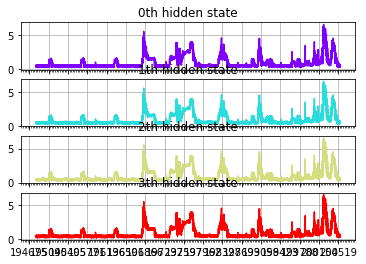

In [22]:
fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
#    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.plot(power, "-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

#     Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()